## Challenge Set 2


#### Topic: Pandas
#### Date: 07-16-2016
#### Name: Sravanthi Ponnana
#### Worked with: N/A

In [2]:
import pandas as pd
movies = pd.read_csv("2013_movies.csv")

In [6]:
from datetime import datetime
movies["ReleaseDate"] = movies["ReleaseDate"].apply(lambda x: datetime.strptime(x,"%Y-%m-%d %H:%M:%S") )

In [11]:
movies.head(n=3)

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22


### Challenge 1

In [14]:
movies = movies.sort_values("ReleaseDate")

In [16]:
releasedate_sum = movies.groupby("ReleaseDate")["DomesticTotalGross"].sum()

In [27]:
releasedate_sum.index = pd.to_datetime(releasedate_sum.index)

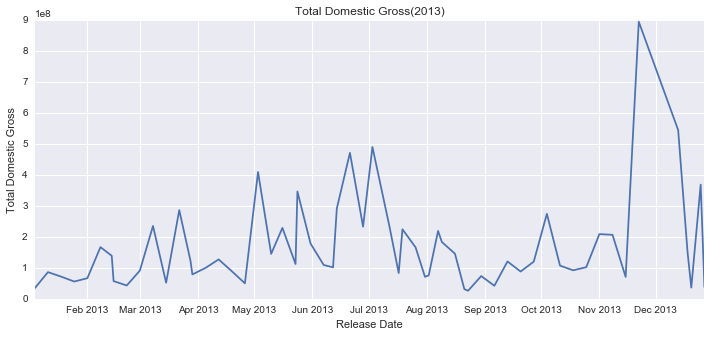

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(12,5))
plt.title("Total Domestic Gross(2013)")
plt.xlabel("Release Date")
plt.ylabel("Total Domestic Gross")
plt.plot(releasedate_sum.index,releasedate_sum)




### Challenge 2

In [41]:
run_time = movies.sort_values("Runtime")

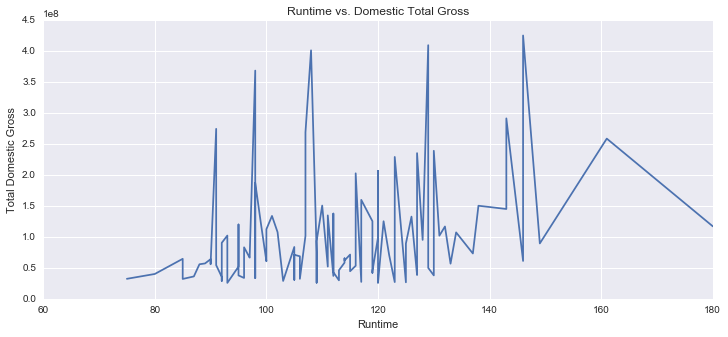

In [44]:
plt.figure(figsize=(12,5))
plt.title("Runtime vs. Domestic Total Gross")
plt.xlabel("Runtime")
plt.ylabel("Total Domestic Gross")
run_time = movies.sort_values("Runtime")
plt.plot(run_time["Runtime"],run_time["DomesticTotalGross"])

### Challenge 3

In [45]:
movies.groupby("Rating")["DomesticTotalGross","Runtime"].mean()

,DomesticTotalGross,Runtime
Rating,,
G,2.684928e+08,107.000000
PG,1.311357e+08,99.933333
PG-13,1.114498e+08,117.510638
R,6.989243e+07,110.729730


### Challenge 4

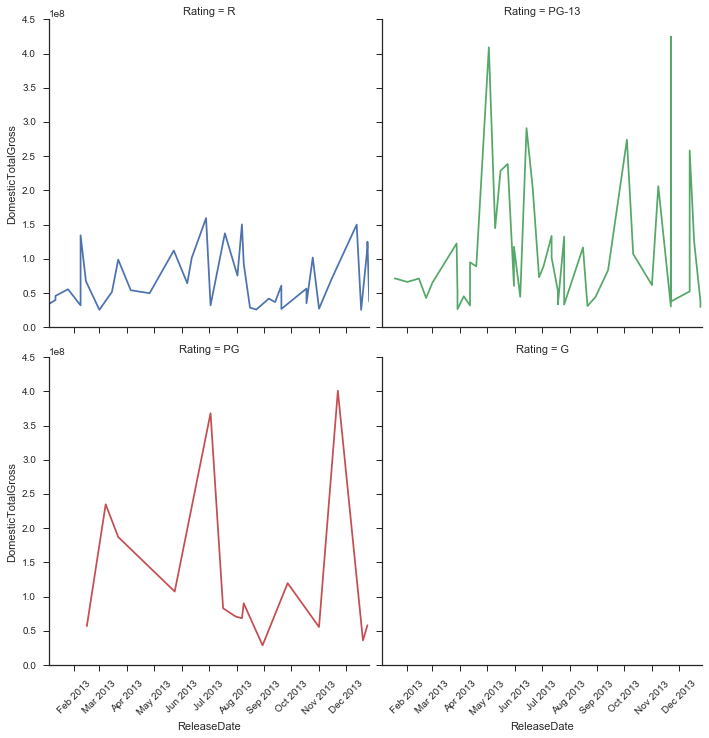

In [70]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
g = sns.FacetGrid(movies,col="Rating",hue="Rating",col_wrap=2,size=5)
g.map(plt.plot,"ReleaseDate","DomesticTotalGross")
for ax in g.axes.flat:  
    plt.setp(ax.get_xticklabels(), rotation=45)

### Challenge 5

In [71]:
director = movies.groupby('Director').mean()
director = director.reset_index()
director = director.sort_values('DomesticTotalGross', ascending = False)
print(director.loc[0]["Director"])

Adam McKay


### Challenge 6

In [105]:
movies['month'] = movies['ReleaseDate'].apply(lambda x: x.strftime("%b"))
movies['month'].value_counts()

Dec    13
Jul    12
Aug    11
Nov    10
Mar     9
Jun     8
May     8
Feb     7
Apr     6
Sep     6
Oct     5
Jan     5
Name: month, dtype: int64

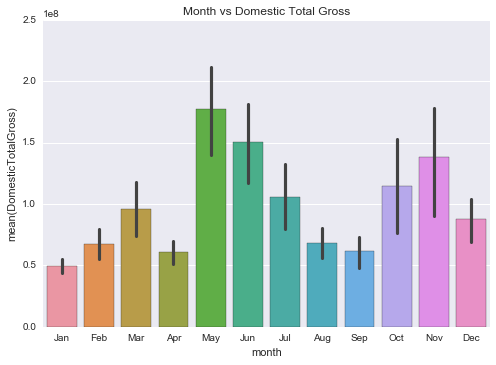

In [111]:
sns.set(color_codes=True)

g = sns.barplot(x="month", y="DomesticTotalGross", data=movies,ci=68)
g.axes.set_title("Month vs Domestic Total Gross")